In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/test-dataset/test.csv
/kaggle/input/playground-series-s3e23/sample_submission.csv
/kaggle/input/playground-series-s3e23/train.csv
/kaggle/input/playground-series-s3e23/test.csv
/kaggle/input/train-dataset/train.csv


In [2]:
#ImportingLibraries

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

In [4]:
df=pd.read_csv("/kaggle/input/train-dataset/train.csv")

In [5]:
df1=pd.read_csv("/kaggle/input/test-dataset/test.csv")

In [6]:
df.head()

,id,loc,v(g),ev(g),iv(g),n,v,l,d,i,...,lOCode,lOComment,lOBlank,locCodeAndComment,uniq_Op,uniq_Opnd,total_Op,total_Opnd,branchCount,defects
0,0,22.0,3.0,1.0,2.0,60.0,278.63,0.06,19.56,14.25,...,17,1,1,0,16.0,9.0,38.0,22.0,5.0,False
1,1,14.0,2.0,1.0,2.0,32.0,151.27,0.14,7.00,21.11,...,11,0,1,0,11.0,11.0,18.0,14.0,3.0,False
2,2,11.0,2.0,1.0,2.0,45.0,197.65,0.11,8.05,22.76,...,8,0,1,0,12.0,11.0,28.0,17.0,3.0,False
3,3,8.0,1.0,1.0,1.0,23.0,94.01,0.19,5.25,17.86,...,4,0,2,0,8.0,6.0,16.0,7.0,1.0,True
4,4,11.0,2.0,1.0,2.0,17.0,60.94,0.18,5.63,12.44,...,7,0,2,0,7.0,6.0,10.0,10.0,3.0,False


In [7]:
df1.head()

,id,loc,v(g),ev(g),iv(g),n,v,l,d,i,...,t,lOCode,lOComment,lOBlank,locCodeAndComment,uniq_Op,uniq_Opnd,total_Op,total_Opnd,branchCount
0,101763,33.0,5.0,1.0,4.0,144.0,824.82,0.04,26.96,30.05,...,1257.60,30,0,3,0,21.0,23.0,87.0,57.0,9.0
1,101764,27.0,8.0,8.0,2.0,125.0,646.24,0.04,22.82,27.22,...,804.58,23,0,2,0,18.0,19.0,70.0,49.0,15.0
2,101765,130.0,11.0,7.0,10.0,545.0,3831.40,0.02,48.15,66.17,...,6453.34,99,9,17,1,26.0,53.0,333.0,244.0,21.0
3,101766,65.0,7.0,1.0,7.0,156.0,855.71,0.06,17.23,49.89,...,896.42,45,8,10,0,15.0,26.0,88.0,60.0,13.0
4,101767,22.0,3.0,1.0,3.0,52.0,238.42,0.10,9.60,26.70,...,145.80,16,0,4,0,12.0,15.0,30.0,24.0,5.0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101763 entries, 0 to 101762
Data columns (total 23 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   id                 101763 non-null  int64  
 1   loc                101763 non-null  float64
 2   v(g)               101763 non-null  float64
 3   ev(g)              101763 non-null  float64
 4   iv(g)              101763 non-null  float64
 5   n                  101763 non-null  float64
 6   v                  101763 non-null  float64
 7   l                  101763 non-null  float64
 8   d                  101763 non-null  float64
 9   i                  101763 non-null  float64
 10  e                  101763 non-null  float64
 11  b                  101763 non-null  float64
 12  t                  101763 non-null  float64
 13  lOCode             101763 non-null  int64  
 14  lOComment          101763 non-null  int64  
 15  lOBlank            101763 non-null  int64  
 16  lo

In [9]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67842 entries, 0 to 67841
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 67842 non-null  int64  
 1   loc                67842 non-null  float64
 2   v(g)               67842 non-null  float64
 3   ev(g)              67842 non-null  float64
 4   iv(g)              67842 non-null  float64
 5   n                  67842 non-null  float64
 6   v                  67842 non-null  float64
 7   l                  67842 non-null  float64
 8   d                  67842 non-null  float64
 9   i                  67842 non-null  float64
 10  e                  67842 non-null  float64
 11  b                  67842 non-null  float64
 12  t                  67842 non-null  float64
 13  lOCode             67842 non-null  int64  
 14  lOComment          67842 non-null  int64  
 15  lOBlank            67842 non-null  int64  
 16  locCodeAndComment  678

In [10]:
df.describe()

,id,loc,v(g),ev(g),iv(g),n,v,l,d,i,...,t,lOCode,lOComment,lOBlank,locCodeAndComment,uniq_Op,uniq_Opnd,total_Op,total_Opnd,branchCount
count,101763.000000,101763.000000,101763.000000,101763.000000,101763.000000,101763.000000,101763.000000,101763.000000,101763.000000,101763.000000,...,101763.000000,101763.000000,101763.000000,101763.000000,101763.000000,101763.000000,101763.000000,101763.000000,101763.000000,101763.000000
mean,50881.000000,37.347160,5.492684,2.845022,3.498826,96.655995,538.280956,0.111634,13.681881,27.573007,...,1141.357982,22.802453,1.773945,3.979865,0.196604,11.896131,15.596671,57.628116,39.249698,9.839549
std,29376.592059,54.600401,7.900855,4.631262,5.534541,171.147191,1270.791601,0.100096,14.121306,22.856742,...,9862.795472,38.541010,5.902412,6.382358,0.998906,6.749549,18.064261,104.537660,71.692309,14.412769
min,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,25440.500000,13.000000,2.000000,1.000000,1.000000,25.000000,97.670000,0.050000,5.600000,15.560000,...,31.380000,7.000000,0.000000,1.000000,0.000000,8.000000,7.000000,15.000000,10.000000,3.000000
50%,50881.000000,22.000000,3.000000,1.000000,2.000000,51.000000,232.790000,0.090000,9.820000,23.360000,...,125.400000,14.000000,0.000000,2.000000,0.000000,11.000000,12.000000,30.000000,20.000000,5.000000
75%,76321.500000,42.000000,6.000000,3.000000,4.000000,111.000000,560.250000,0.150000,18.000000,34.340000,...,565.920000,26.000000,1.000000,5.000000,0.000000,16.000000,20.000000,66.000000,45.000000,11.000000
max,101762.000000,3442.000000,404.000000,165.000000,402.000000,8441.000000,80843.080000,1.000000,418.200000,569.780000,...,935923.390000,2824.000000,344.000000,219.000000,43.000000,410.000000,1026.000000,5420.000000,3021.000000,503.000000


In [11]:
df1.describe()

,id,loc,v(g),ev(g),iv(g),n,v,l,d,i,...,t,lOCode,lOComment,lOBlank,locCodeAndComment,uniq_Op,uniq_Opnd,total_Op,total_Opnd,branchCount
count,67842.000000,67842.000000,67842.000000,67842.000000,67842.000000,67842.000000,67842.000000,67842.000000,67842.000000,67842.000000,...,67842.000000,67842.000000,67842.000000,67842.000000,67842.000000,67842.000000,67842.000000,67842.000000,67842.000000,67842.000000
mean,135683.500000,37.855945,5.559462,2.857699,3.535715,98.222178,548.422497,0.111521,13.762472,27.635377,...,1218.682009,23.131924,1.832493,4.020739,0.200834,11.909776,15.678370,58.325212,39.845258,9.985923
std,19584.442818,55.793918,8.237389,4.666370,5.339085,179.123492,1318.416828,0.100840,14.487425,23.420521,...,10739.081373,39.606659,6.229052,7.136069,1.044581,6.974254,17.979368,105.491447,72.756320,15.342975
min,101763.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,118723.250000,13.000000,2.000000,1.000000,1.000000,25.000000,96.210000,0.040000,5.500000,15.540000,...,31.270000,7.000000,0.000000,1.000000,0.000000,8.000000,7.000000,15.000000,10.000000,3.000000
50%,135683.500000,22.000000,3.000000,1.000000,2.000000,51.000000,232.790000,0.090000,9.820000,23.230000,...,126.490000,14.000000,0.000000,2.000000,0.000000,12.000000,12.000000,30.000000,20.000000,5.000000
75%,152643.750000,42.000000,6.000000,3.000000,4.000000,111.000000,560.250000,0.140000,18.000000,34.270000,...,561.802500,26.000000,1.000000,5.000000,0.000000,16.000000,20.000000,66.000000,44.000000,11.000000
max,169604.000000,1891.000000,470.000000,165.000000,402.000000,8441.000000,80843.080000,1.000000,418.200000,569.780000,...,935923.390000,1599.000000,344.000000,447.000000,42.000000,411.000000,1026.000000,3368.000000,2301.000000,826.000000


In [12]:
df.isna().sum()

id                   0
loc                  0
v(g)                 0
ev(g)                0
iv(g)                0
n                    0
v                    0
l                    0
d                    0
i                    0
e                    0
b                    0
t                    0
lOCode               0
lOComment            0
lOBlank              0
locCodeAndComment    0
uniq_Op              0
uniq_Opnd            0
total_Op             0
total_Opnd           0
branchCount          0
defects              0
dtype: int64

<Axes: >

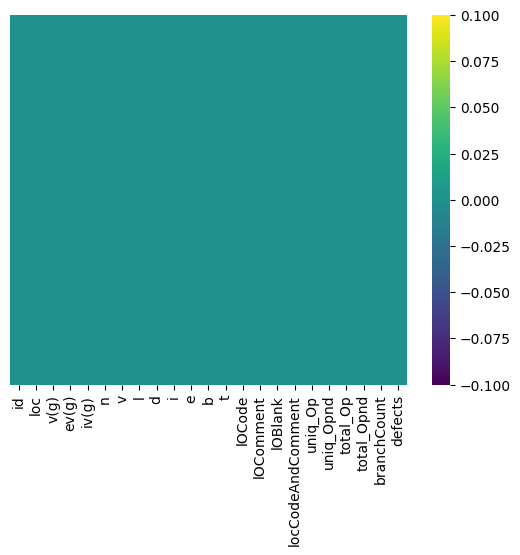

In [13]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=True,cmap="viridis")

<Axes: >

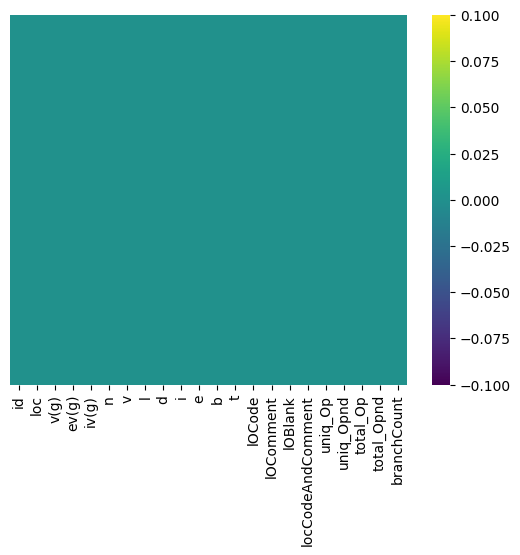

In [14]:
sns.heatmap(df1.isnull(),yticklabels=False,cbar=True,cmap="viridis")

<Axes: >

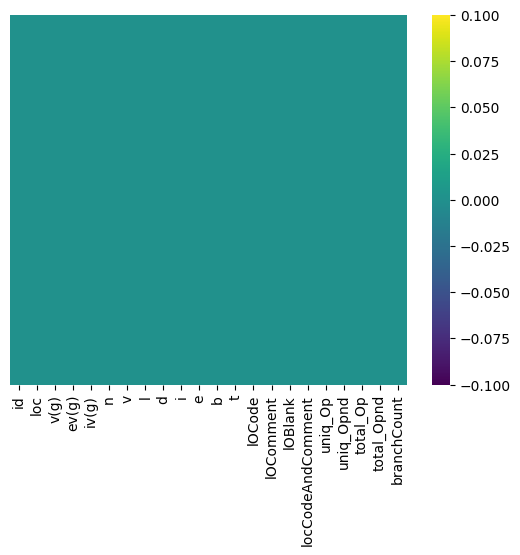

In [15]:
sns.heatmap(df1.isnull(),yticklabels=False,cbar=True,cmap="viridis")

In [16]:
df.corr().style.background_gradient(cmap='coolwarm')

,id,loc,v(g),ev(g),iv(g),n,v,l,d,i,e,b,t,lOCode,lOComment,lOBlank,locCodeAndComment,uniq_Op,uniq_Opnd,total_Op,total_Opnd,branchCount,defects
id,1.000000,0.000790,0.003252,-0.000786,0.001259,0.003580,0.004500,-0.002157,0.004466,-0.000969,0.000965,0.003757,0.002752,0.003029,0.003214,0.003859,0.001628,0.004068,0.003751,0.003615,0.004165,0.002146,0.001976
loc,0.000790,1.000000,0.761509,0.544569,0.696327,0.759605,0.758069,-0.388018,0.599474,0.486427,0.501281,0.739926,0.512228,0.803460,0.528029,0.670751,0.246244,0.367068,0.637582,0.764612,0.761662,0.762755,0.342642
v(g),0.003252,0.761509,1.000000,0.729249,0.790553,0.631041,0.618267,-0.387270,0.574305,0.304531,0.430184,0.611954,0.472080,0.641835,0.379520,0.461759,0.208324,0.389917,0.532358,0.639125,0.606453,0.966702,0.301187
ev(g),-0.000786,0.544569,0.729249,1.000000,0.545255,0.390504,0.367697,-0.325488,0.357735,0.160594,0.275179,0.360889,0.280391,0.382541,0.292689,0.282293,0.164563,0.200460,0.279100,0.394963,0.372867,0.774752,0.259928
iv(g),0.001259,0.696327,0.790553,0.545255,1.000000,0.589718,0.585134,-0.291631,0.487112,0.319971,0.394291,0.563969,0.414640,0.636895,0.337728,0.426030,0.178546,0.378869,0.550633,0.591597,0.567097,0.747870,0.245618
n,0.003580,0.759605,0.631041,0.390504,0.589718,1.000000,0.928390,-0.300350,0.808291,0.725408,0.569544,0.918254,0.602202,0.911761,0.566374,0.775345,0.262916,0.618021,0.818994,0.963373,0.953080,0.626009,0.258080
v,0.004500,0.758069,0.618267,0.367697,0.585134,0.928390,1.000000,-0.254087,0.748121,0.673386,0.582332,0.935263,0.590431,0.899258,0.531985,0.735278,0.242057,0.544283,0.798964,0.936446,0.942189,0.608678,0.231179
l,-0.002157,-0.388018,-0.387270,-0.325488,-0.291631,-0.300350,-0.254087,1.000000,-0.426309,-0.162300,-0.091764,-0.254245,-0.097000,-0.289713,-0.187982,-0.288838,-0.125480,-0.399440,-0.283644,-0.294469,-0.290559,-0.416185,-0.253237
d,0.004466,0.599474,0.574305,0.357735,0.487112,0.808291,0.748121,-0.426309,1.000000,0.515402,0.471276,0.755130,0.493976,0.778856,0.486619,0.676297,0.268184,0.782781,0.690652,0.808275,0.784738,0.575155,0.241936
i,-0.000969,0.486427,0.304531,0.160594,0.319971,0.725408,0.673386,-0.162300,0.515402,1.000000,0.286149,0.681469,0.300938,0.677093,0.435828,0.654349,0.214151,0.527640,0.803330,0.702058,0.740201,0.313935,0.208577


In [17]:
df1.corr().style.background_gradient(cmap='coolwarm')

,id,loc,v(g),ev(g),iv(g),n,v,l,d,i,e,b,t,lOCode,lOComment,lOBlank,locCodeAndComment,uniq_Op,uniq_Opnd,total_Op,total_Opnd,branchCount
id,1.000000,0.003459,0.001155,0.004511,0.004928,0.004488,0.003995,0.000983,0.004283,-0.000046,0.003347,0.004397,0.002444,0.003915,0.006417,0.008024,-0.001582,0.002655,0.001699,0.005290,0.003877,0.001546
loc,0.003459,1.000000,0.775814,0.555164,0.721281,0.762842,0.759701,-0.386687,0.617394,0.512594,0.513422,0.785904,0.553680,0.823753,0.540377,0.660249,0.279452,0.407046,0.663650,0.769028,0.767939,0.787710
v(g),0.001155,0.775814,1.000000,0.734375,0.839167,0.618311,0.628619,-0.375430,0.556420,0.343208,0.426535,0.644202,0.452999,0.676523,0.379809,0.498375,0.239726,0.434921,0.597208,0.628025,0.610486,0.983673
ev(g),0.004511,0.555164,0.734375,1.000000,0.590190,0.391216,0.381487,-0.321107,0.353280,0.178641,0.221811,0.397821,0.230064,0.406648,0.288139,0.288777,0.179213,0.189043,0.301006,0.397640,0.386683,0.774679
iv(g),0.004928,0.721281,0.839167,0.590190,1.000000,0.594493,0.613723,-0.305141,0.490841,0.374359,0.365941,0.630024,0.390890,0.643064,0.356276,0.505058,0.228768,0.396395,0.567873,0.601418,0.593574,0.829407
n,0.004488,0.762842,0.618311,0.391216,0.594493,1.000000,0.945078,-0.293876,0.803503,0.741686,0.547498,0.962488,0.582365,0.902304,0.558402,0.750029,0.307467,0.610889,0.828732,0.965467,0.962478,0.628782
v,0.003995,0.759701,0.628619,0.381487,0.613723,0.945078,1.000000,-0.250818,0.740404,0.693259,0.567927,0.955900,0.606228,0.887480,0.534685,0.731010,0.291848,0.559886,0.805184,0.935617,0.933328,0.631804
l,0.000983,-0.386687,-0.375430,-0.321107,-0.305141,-0.293876,-0.250818,1.000000,-0.418560,-0.169107,-0.089653,-0.261479,-0.095274,-0.289333,-0.186533,-0.264708,-0.124734,-0.386215,-0.288821,-0.296604,-0.292906,-0.396097
d,0.004283,0.617394,0.556420,0.353280,0.490841,0.803503,0.740404,-0.418560,1.000000,0.525293,0.468091,0.768235,0.493688,0.783046,0.496667,0.638119,0.287506,0.779977,0.673773,0.818534,0.785920,0.565213
i,-0.000046,0.512594,0.343208,0.178641,0.374359,0.741686,0.693259,-0.169107,0.525293,1.000000,0.316316,0.723017,0.335758,0.703091,0.427379,0.633548,0.236053,0.525859,0.841545,0.731339,0.771071,0.355440


<Axes: xlabel='defects', ylabel='loc'>

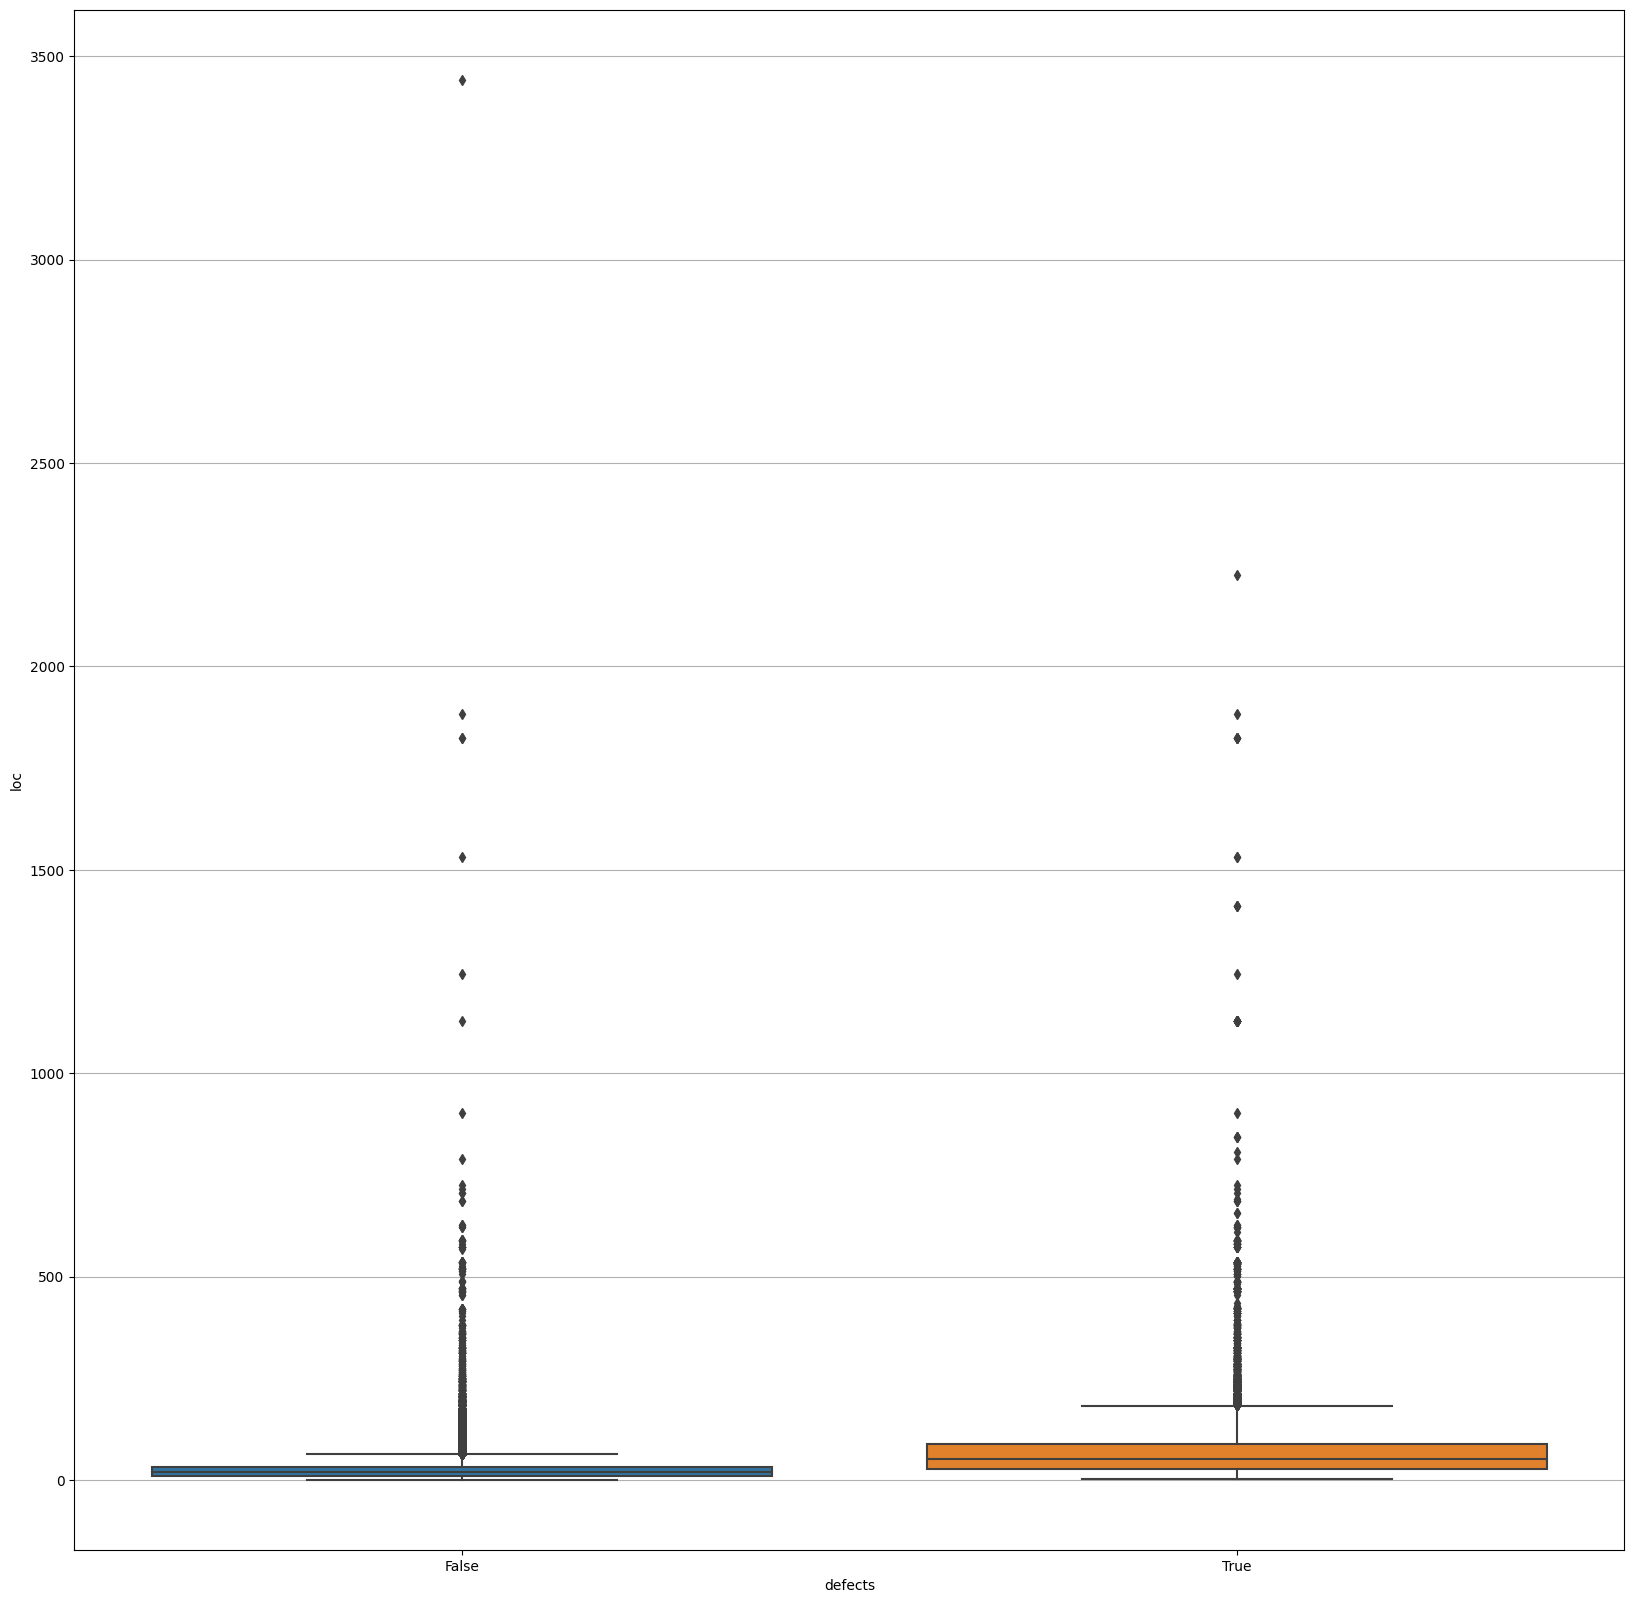

In [18]:
plt.figure(figsize=(20,20))
plt.grid()
sns.boxplot(data=df,x="defects",y="loc")


<Axes: xlabel='defects', ylabel='v(g)'>

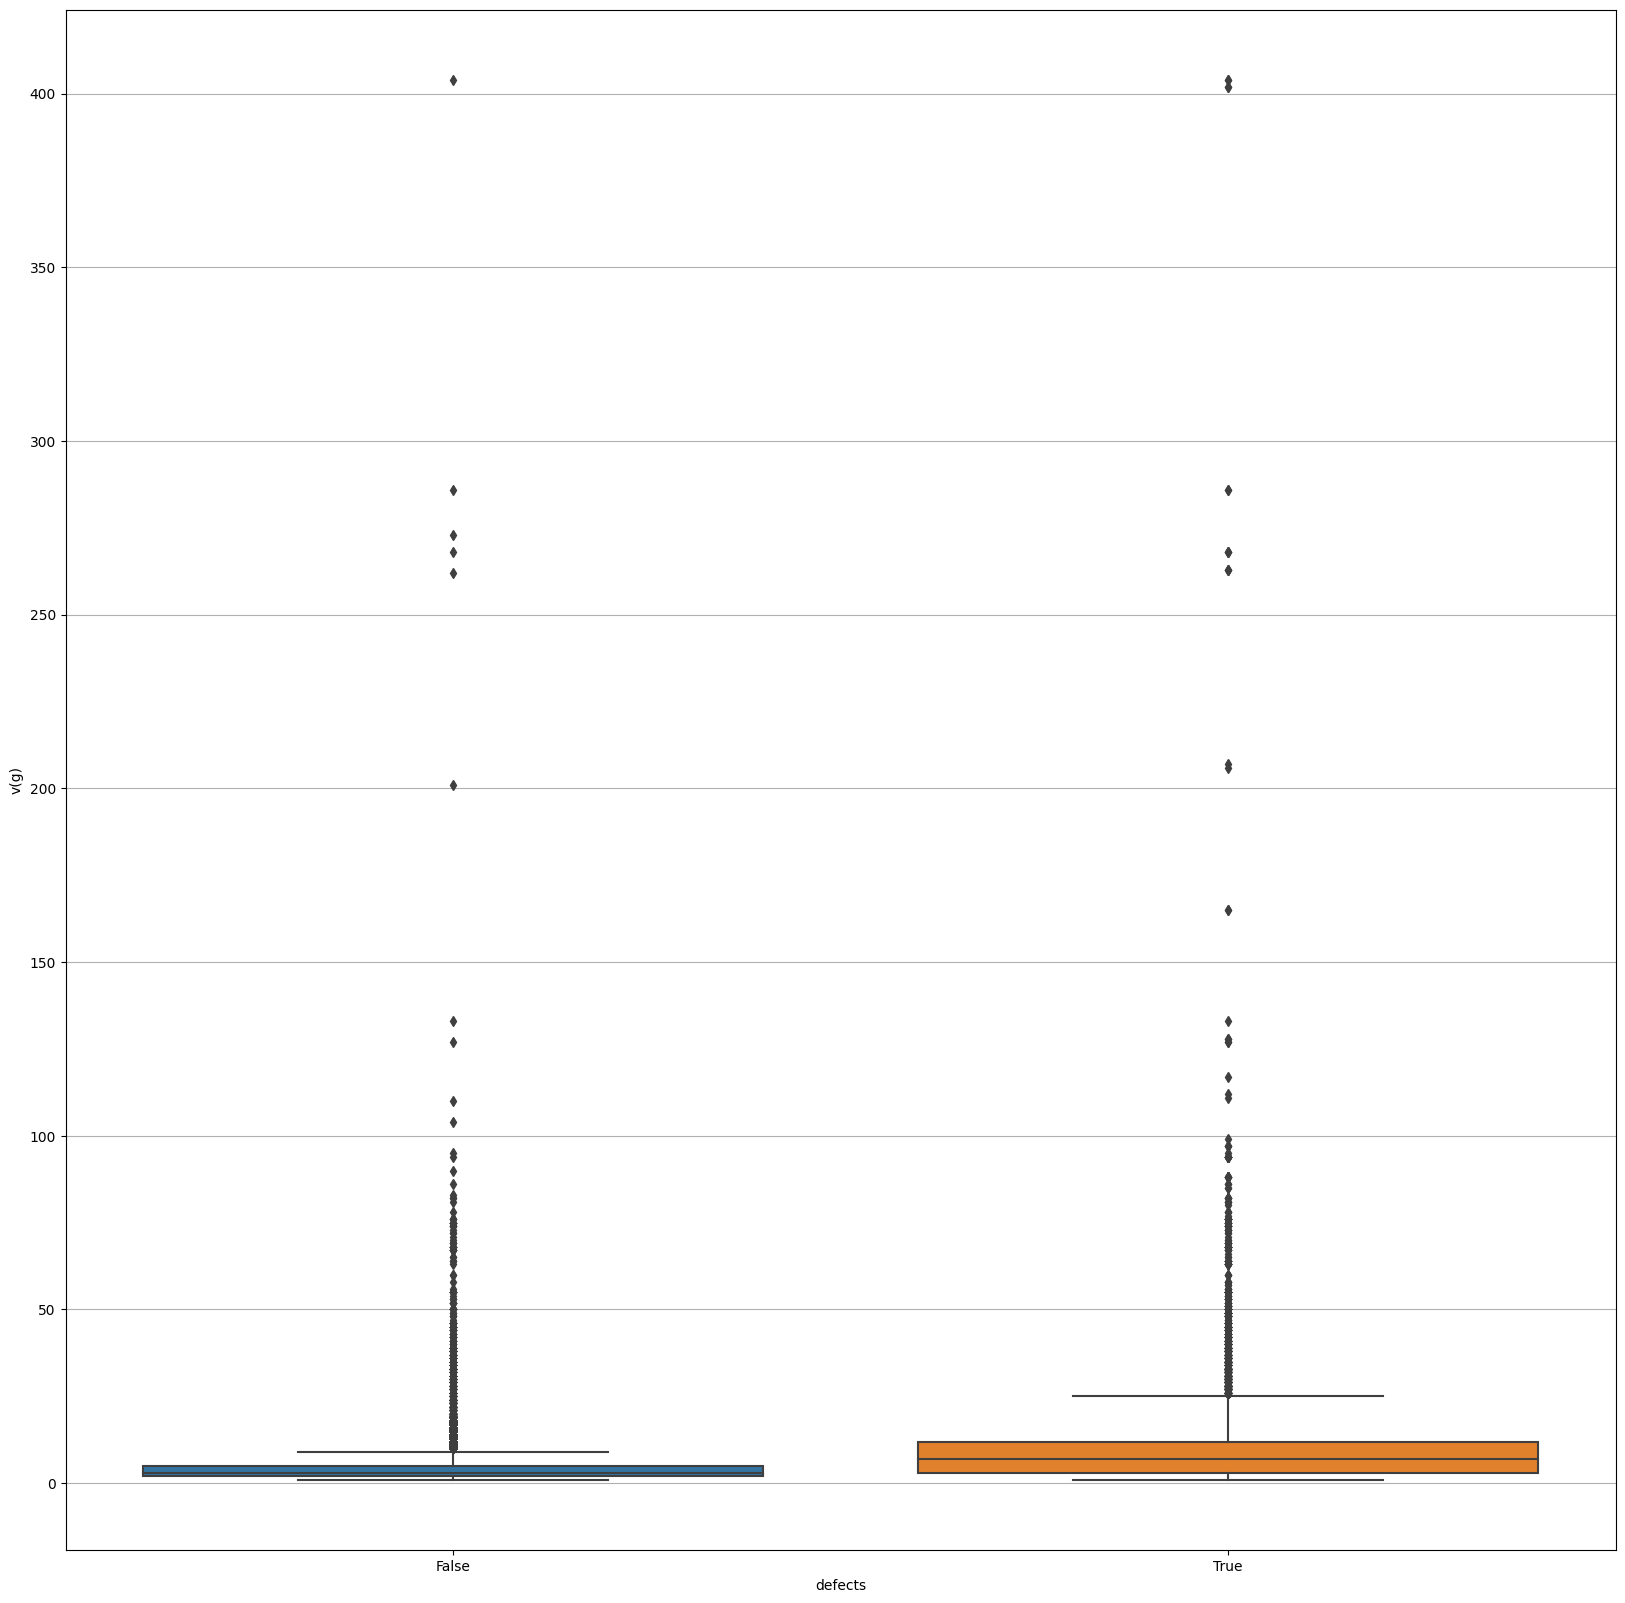

In [19]:
plt.figure(figsize=(20,20))
plt.grid()
sns.boxplot(data=df,x="defects",y="v(g)")

<Axes: xlabel='defects', ylabel='n'>

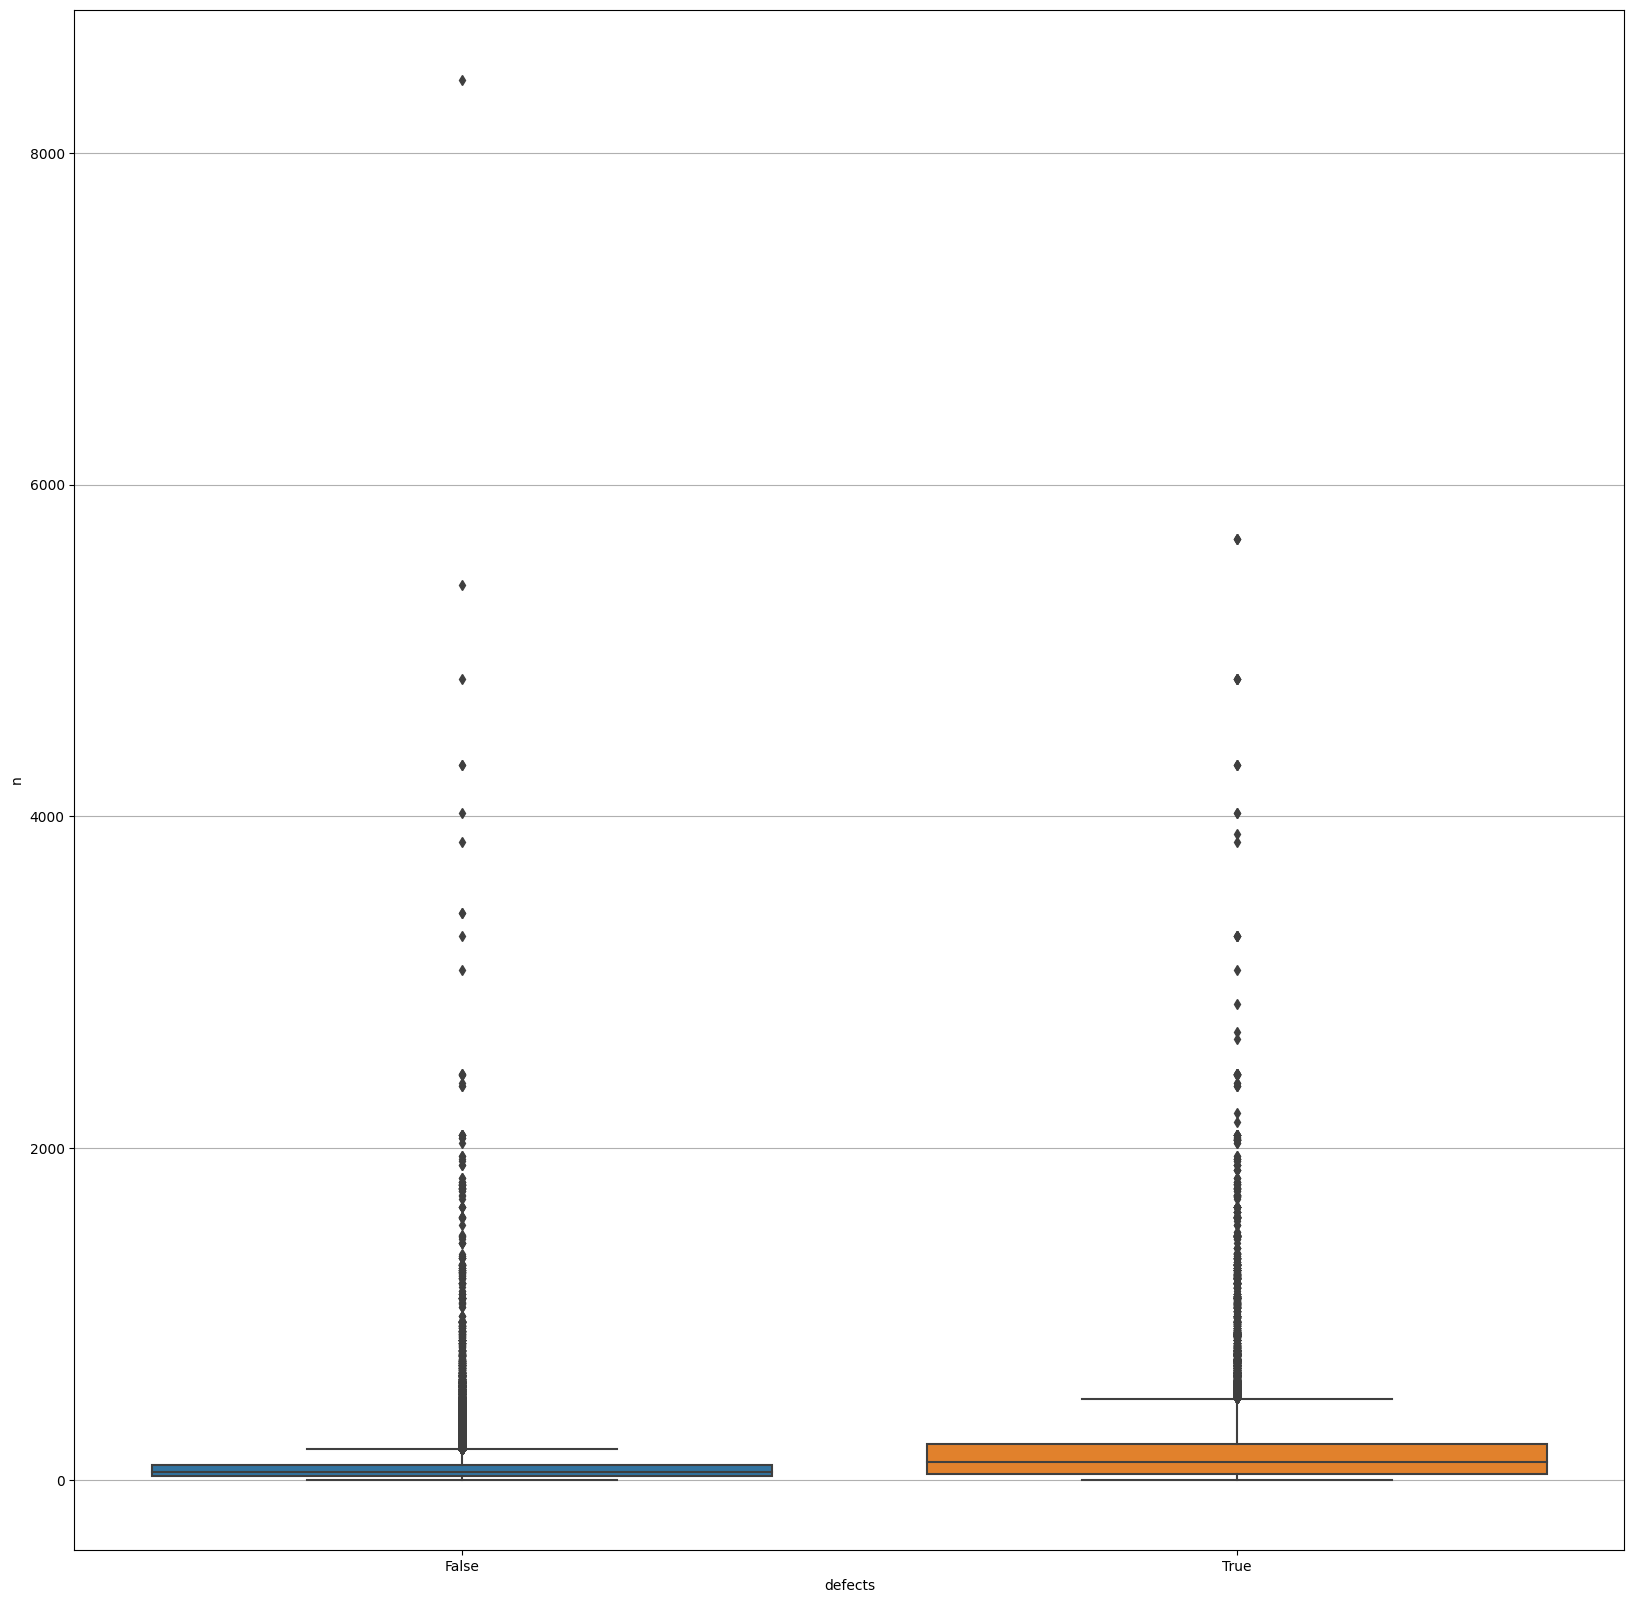

In [20]:
plt.figure(figsize=(20,20))
plt.grid()
sns.boxplot(data=df,x="defects",y="n")

<Axes: xlabel='defects', ylabel='iv(g)'>

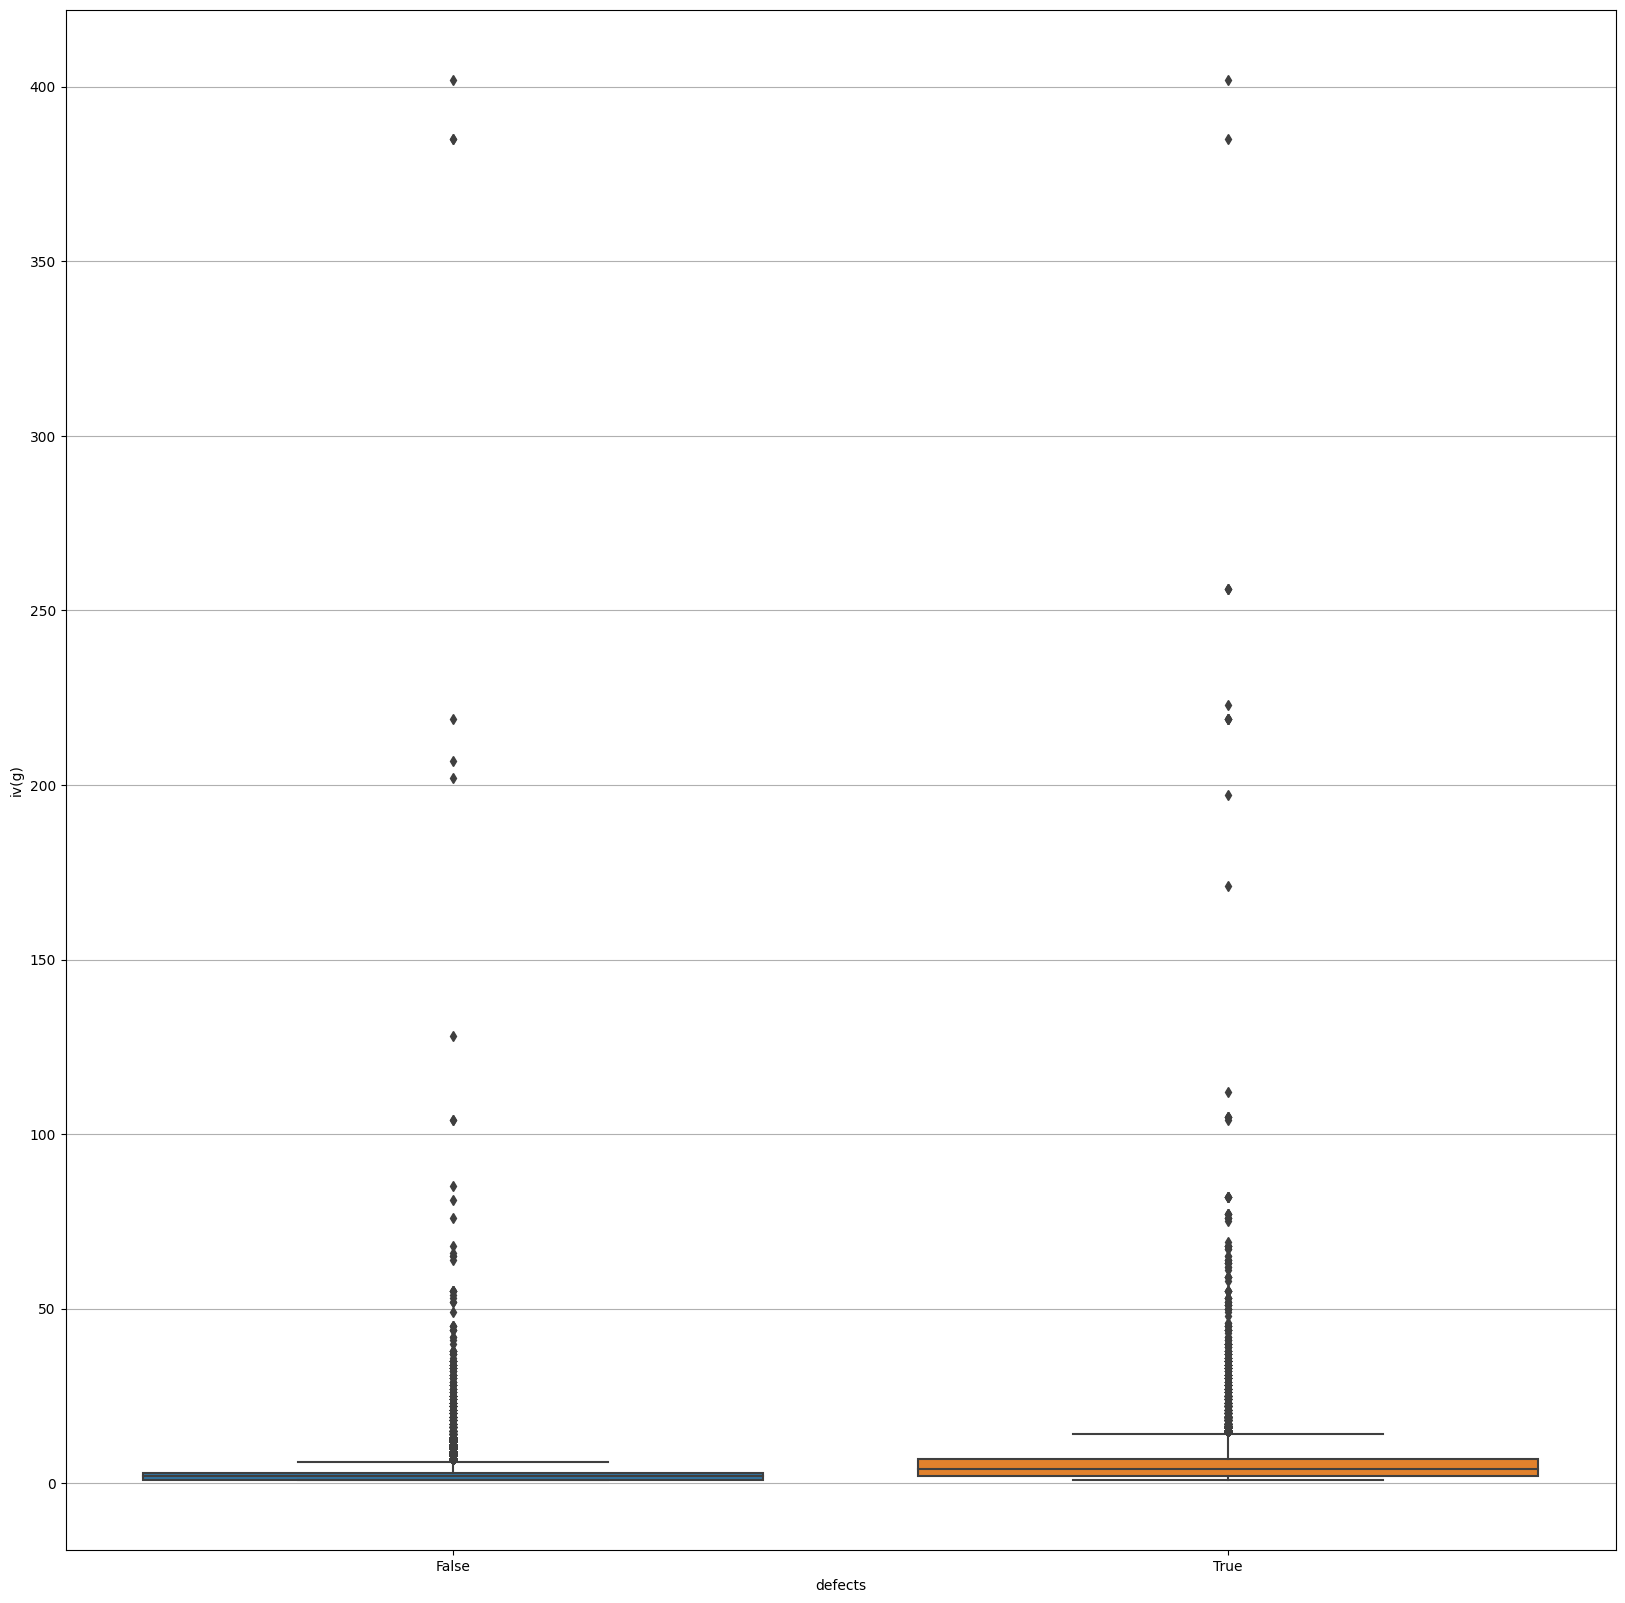

In [21]:
plt.figure(figsize=(20,20))
plt.grid()
sns.boxplot(data=df,x="defects",y="iv(g)")

<Axes: xlabel='defects', ylabel='v'>

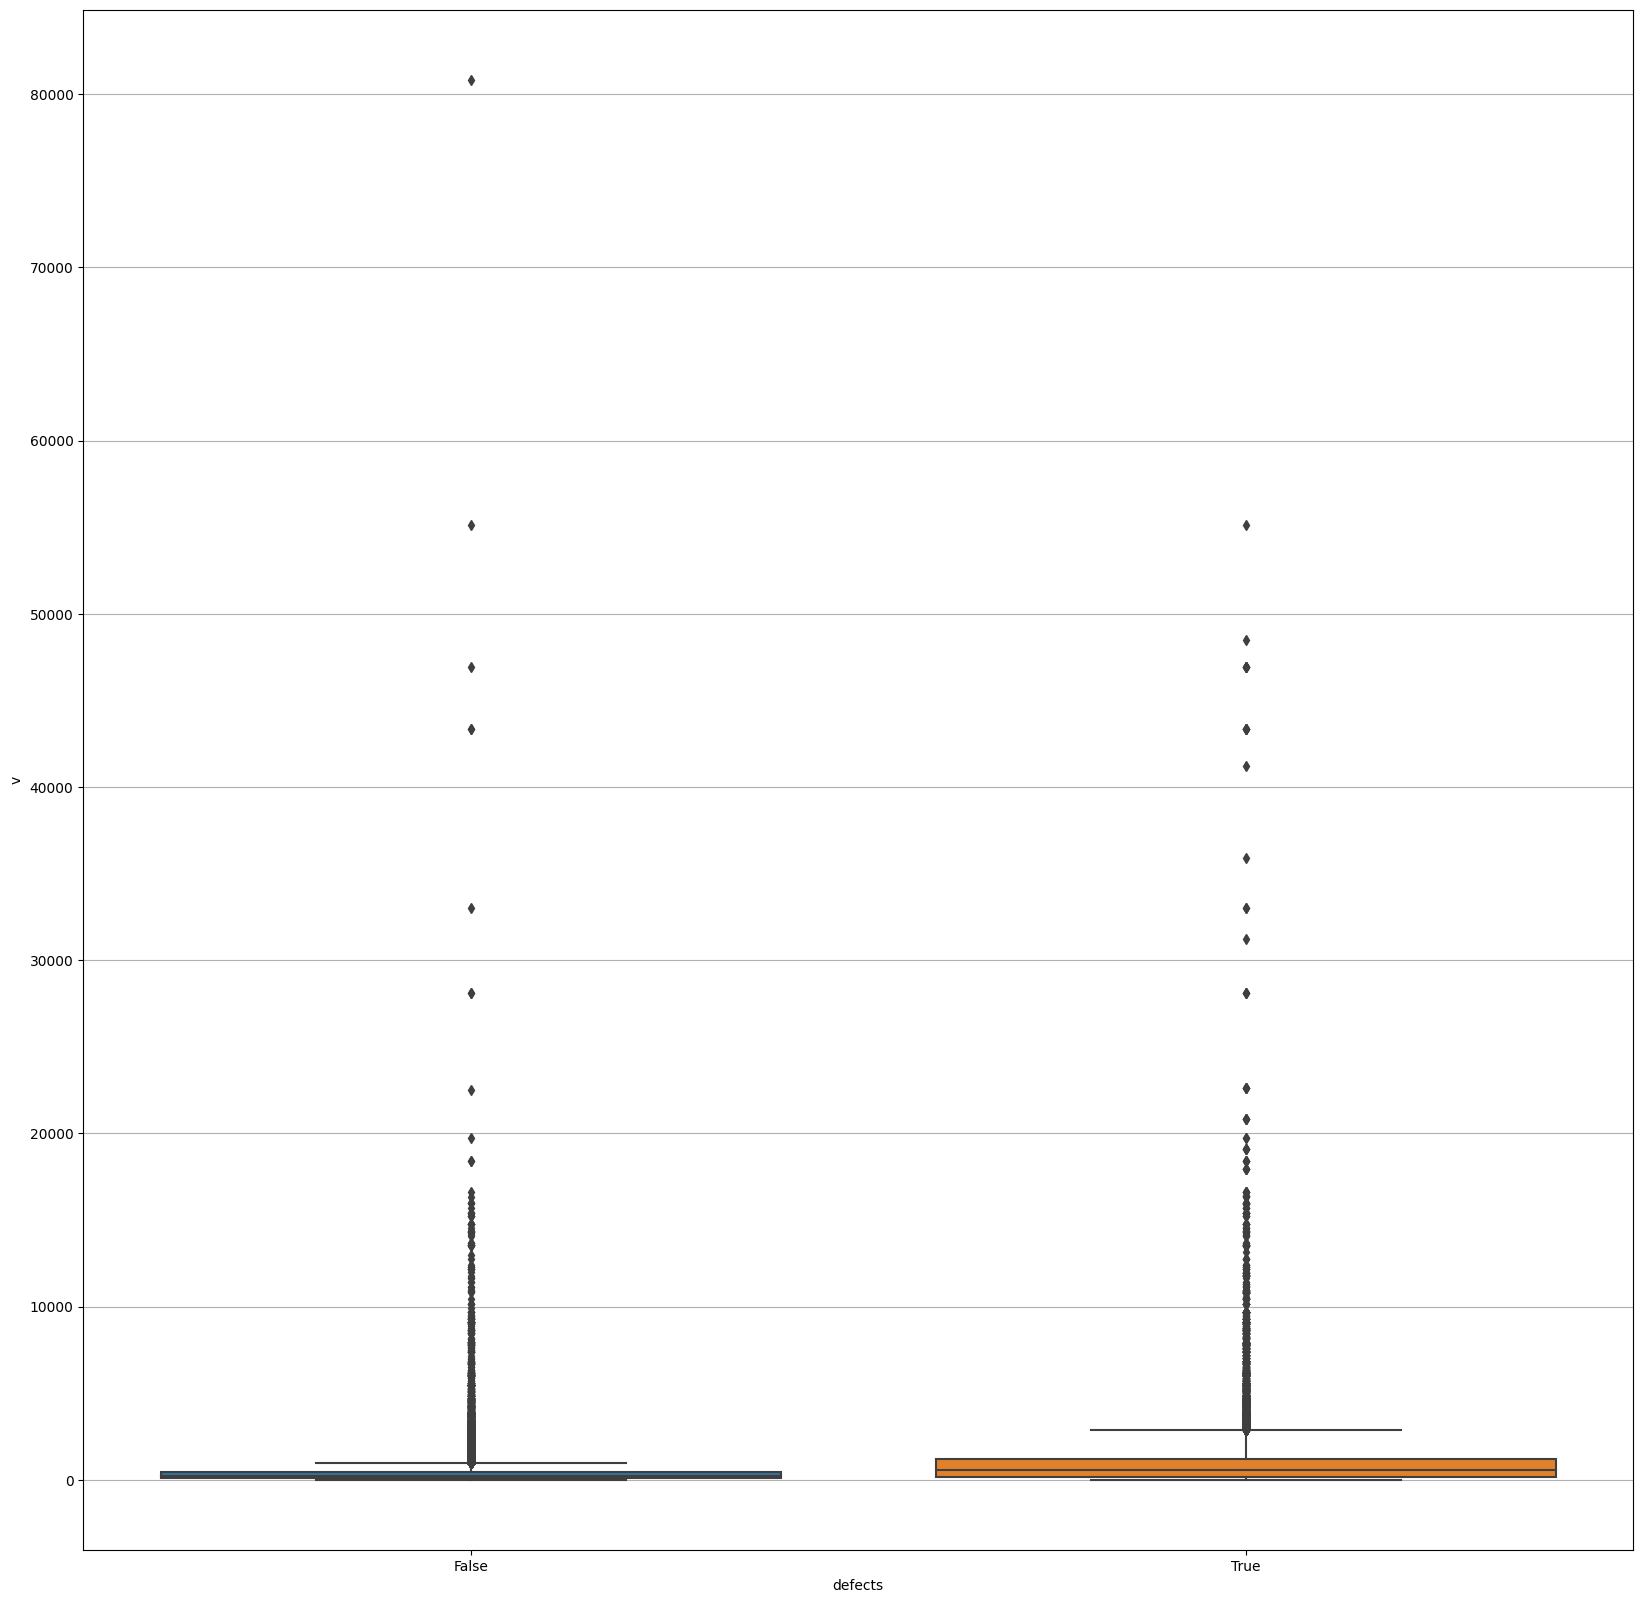

In [22]:
plt.figure(figsize=(20,20))
plt.grid()
sns.boxplot(data=df,x="defects",y="v")

<Axes: xlabel='defects', ylabel='l'>

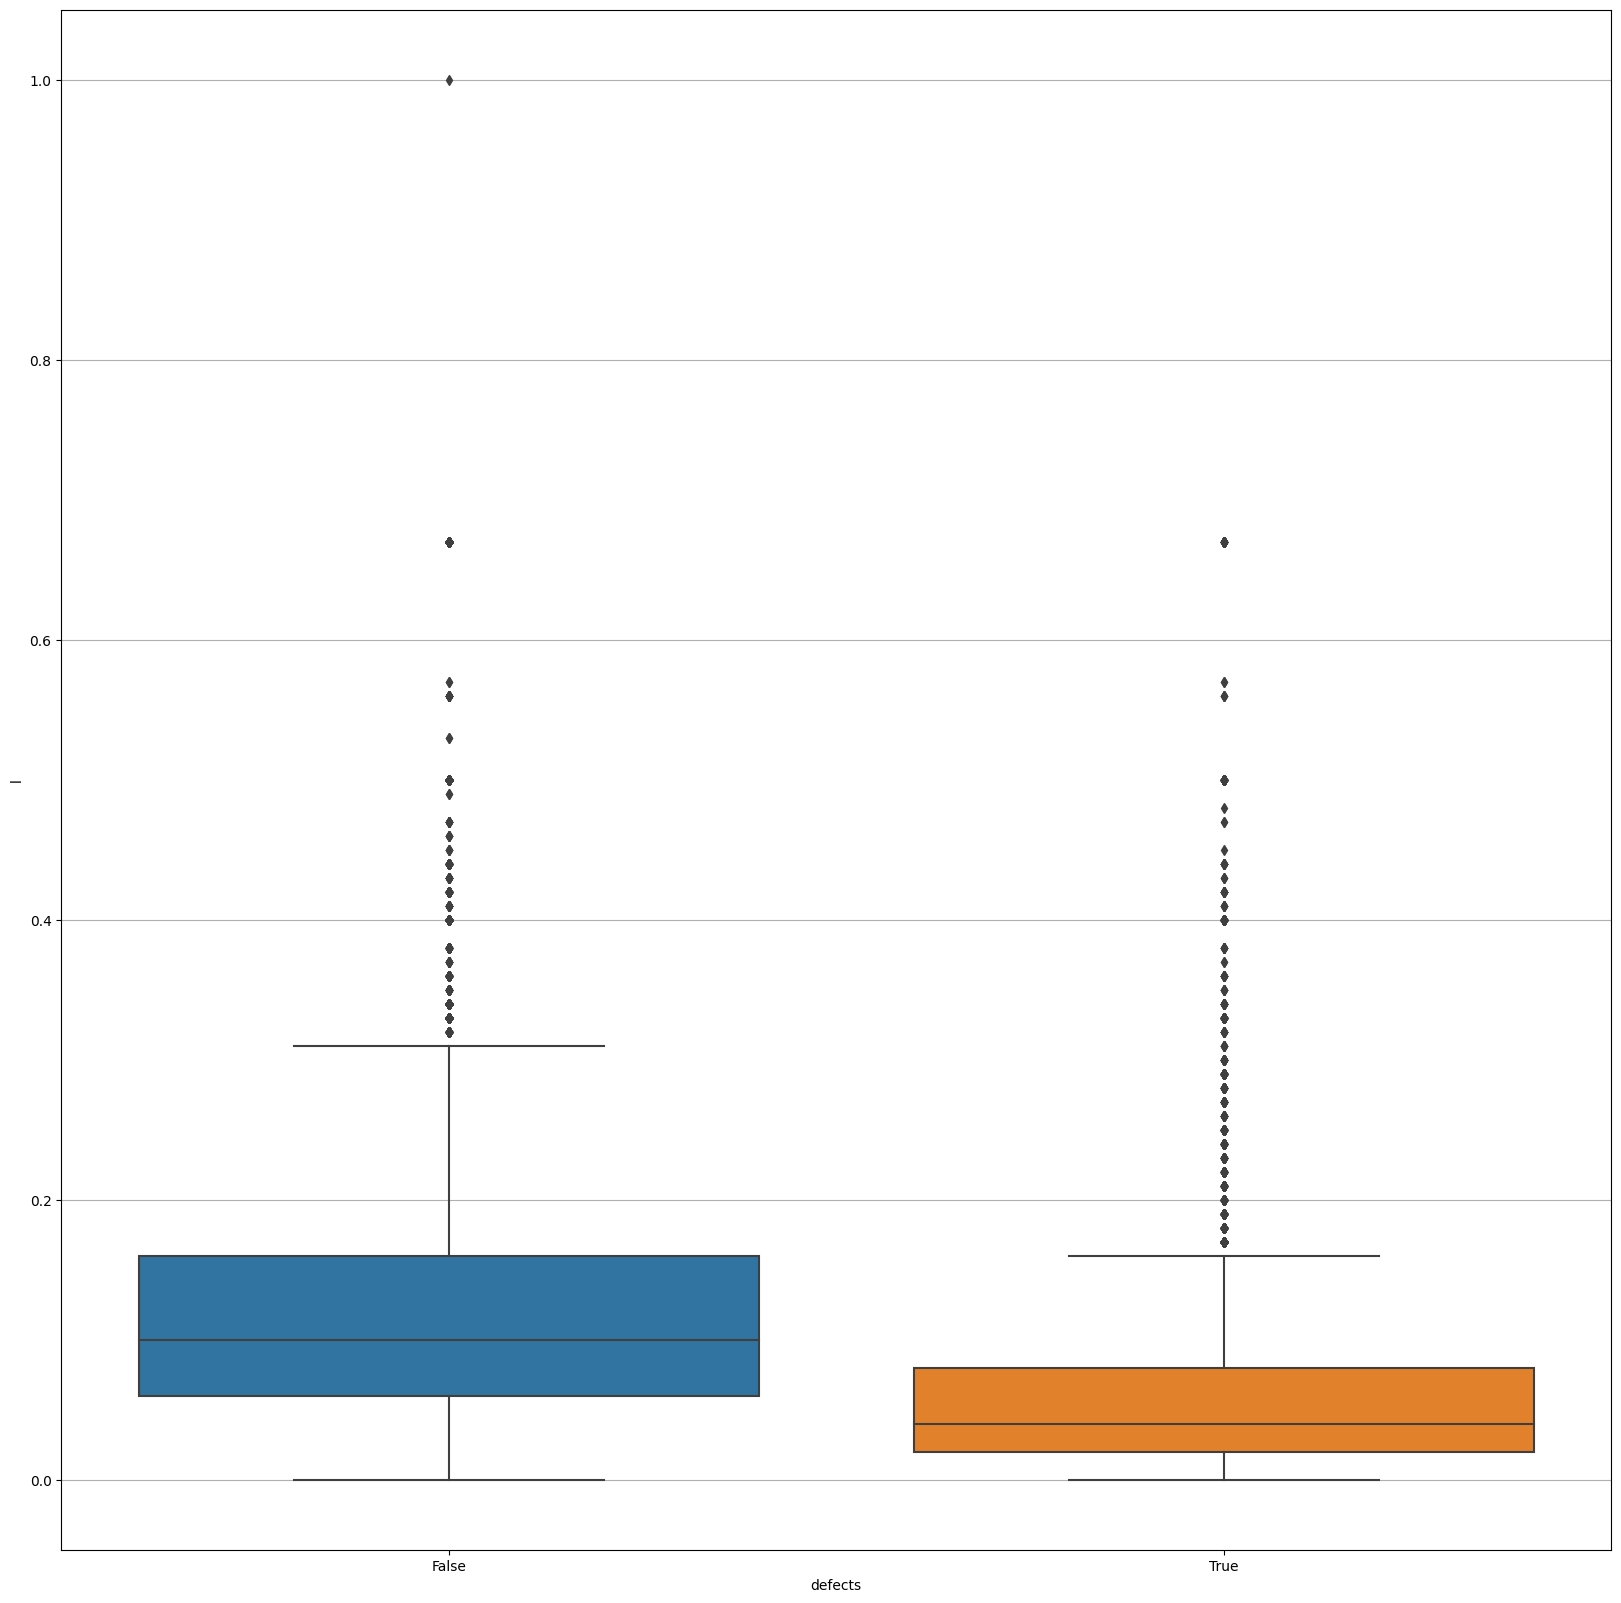

In [23]:
plt.figure(figsize=(20,20))
plt.grid()
sns.boxplot(data=df,x="defects",y="l")

<Axes: xlabel='defects', ylabel='d'>

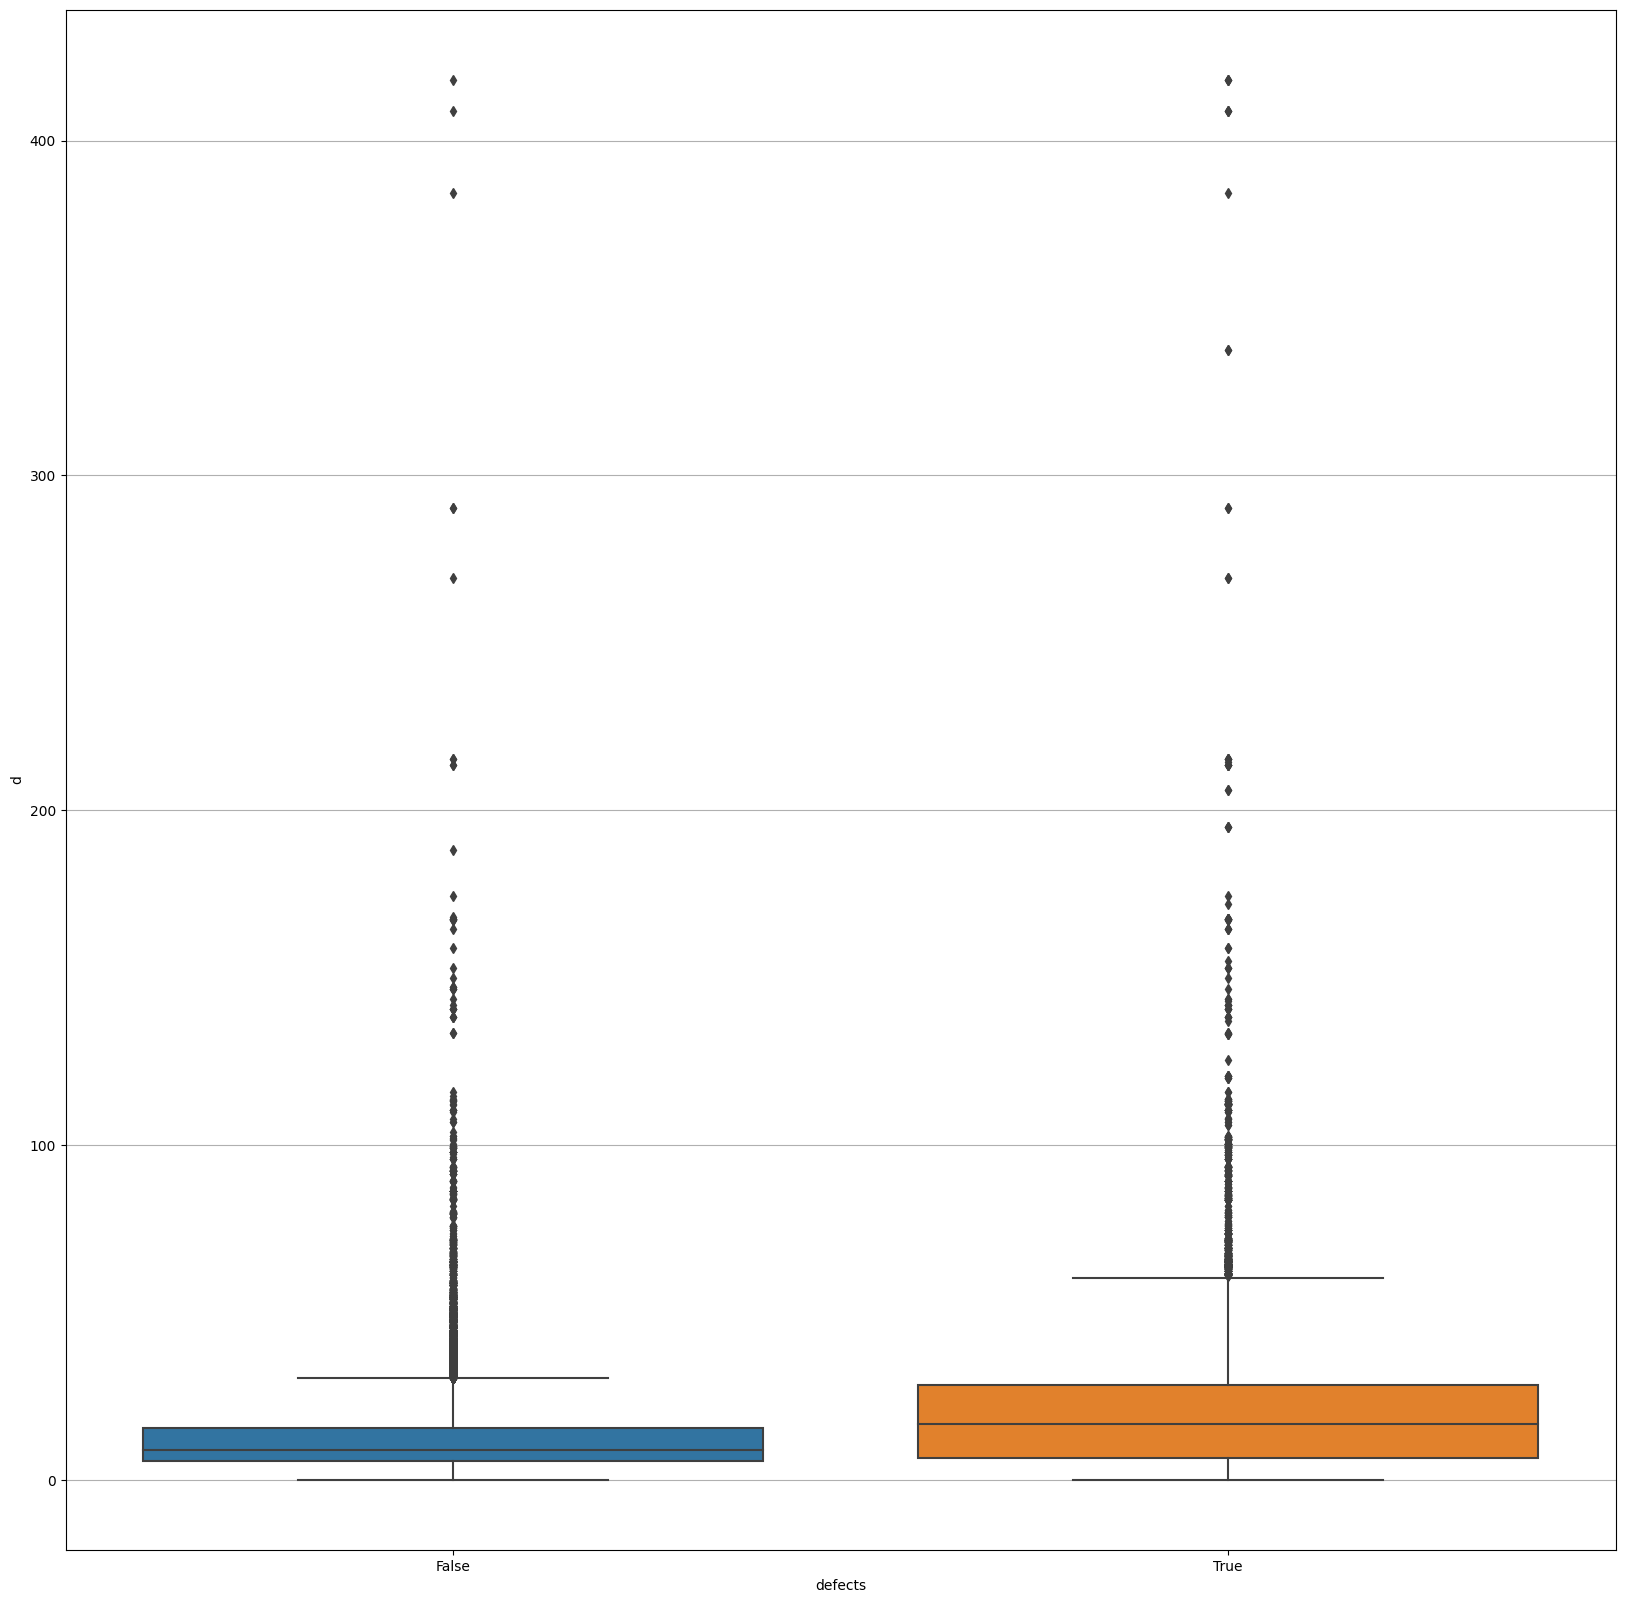

In [24]:
plt.figure(figsize=(20,20))
plt.grid()
sns.boxplot(data=df,x="defects",y="d")

<Axes: xlabel='defects', ylabel='i'>

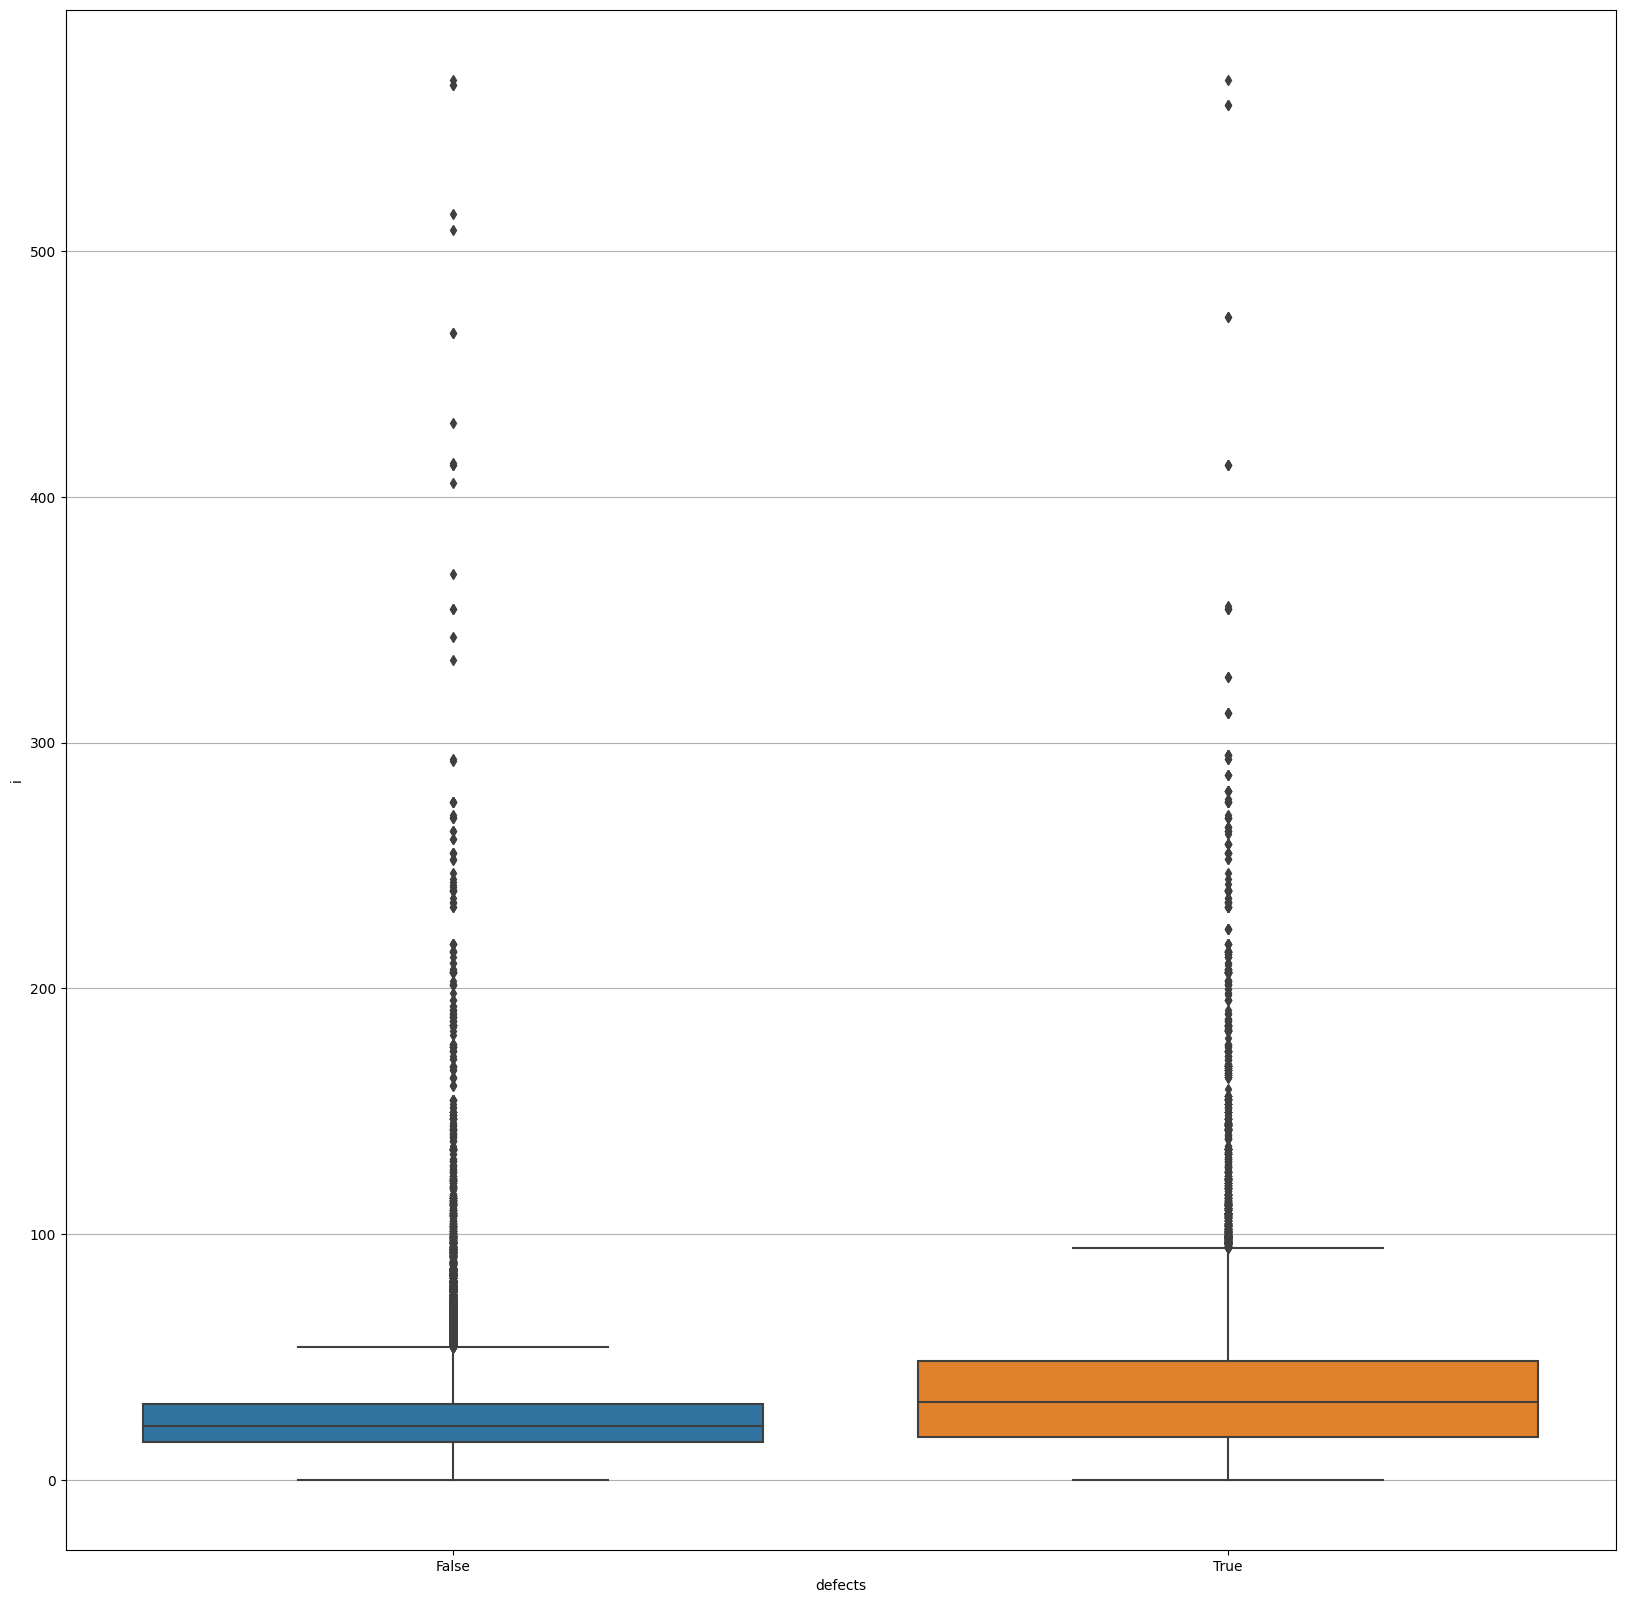

In [25]:
plt.figure(figsize=(20,20))
plt.grid()
sns.boxplot(data=df,x="defects",y="i")

<Axes: xlabel='defects', ylabel='e'>

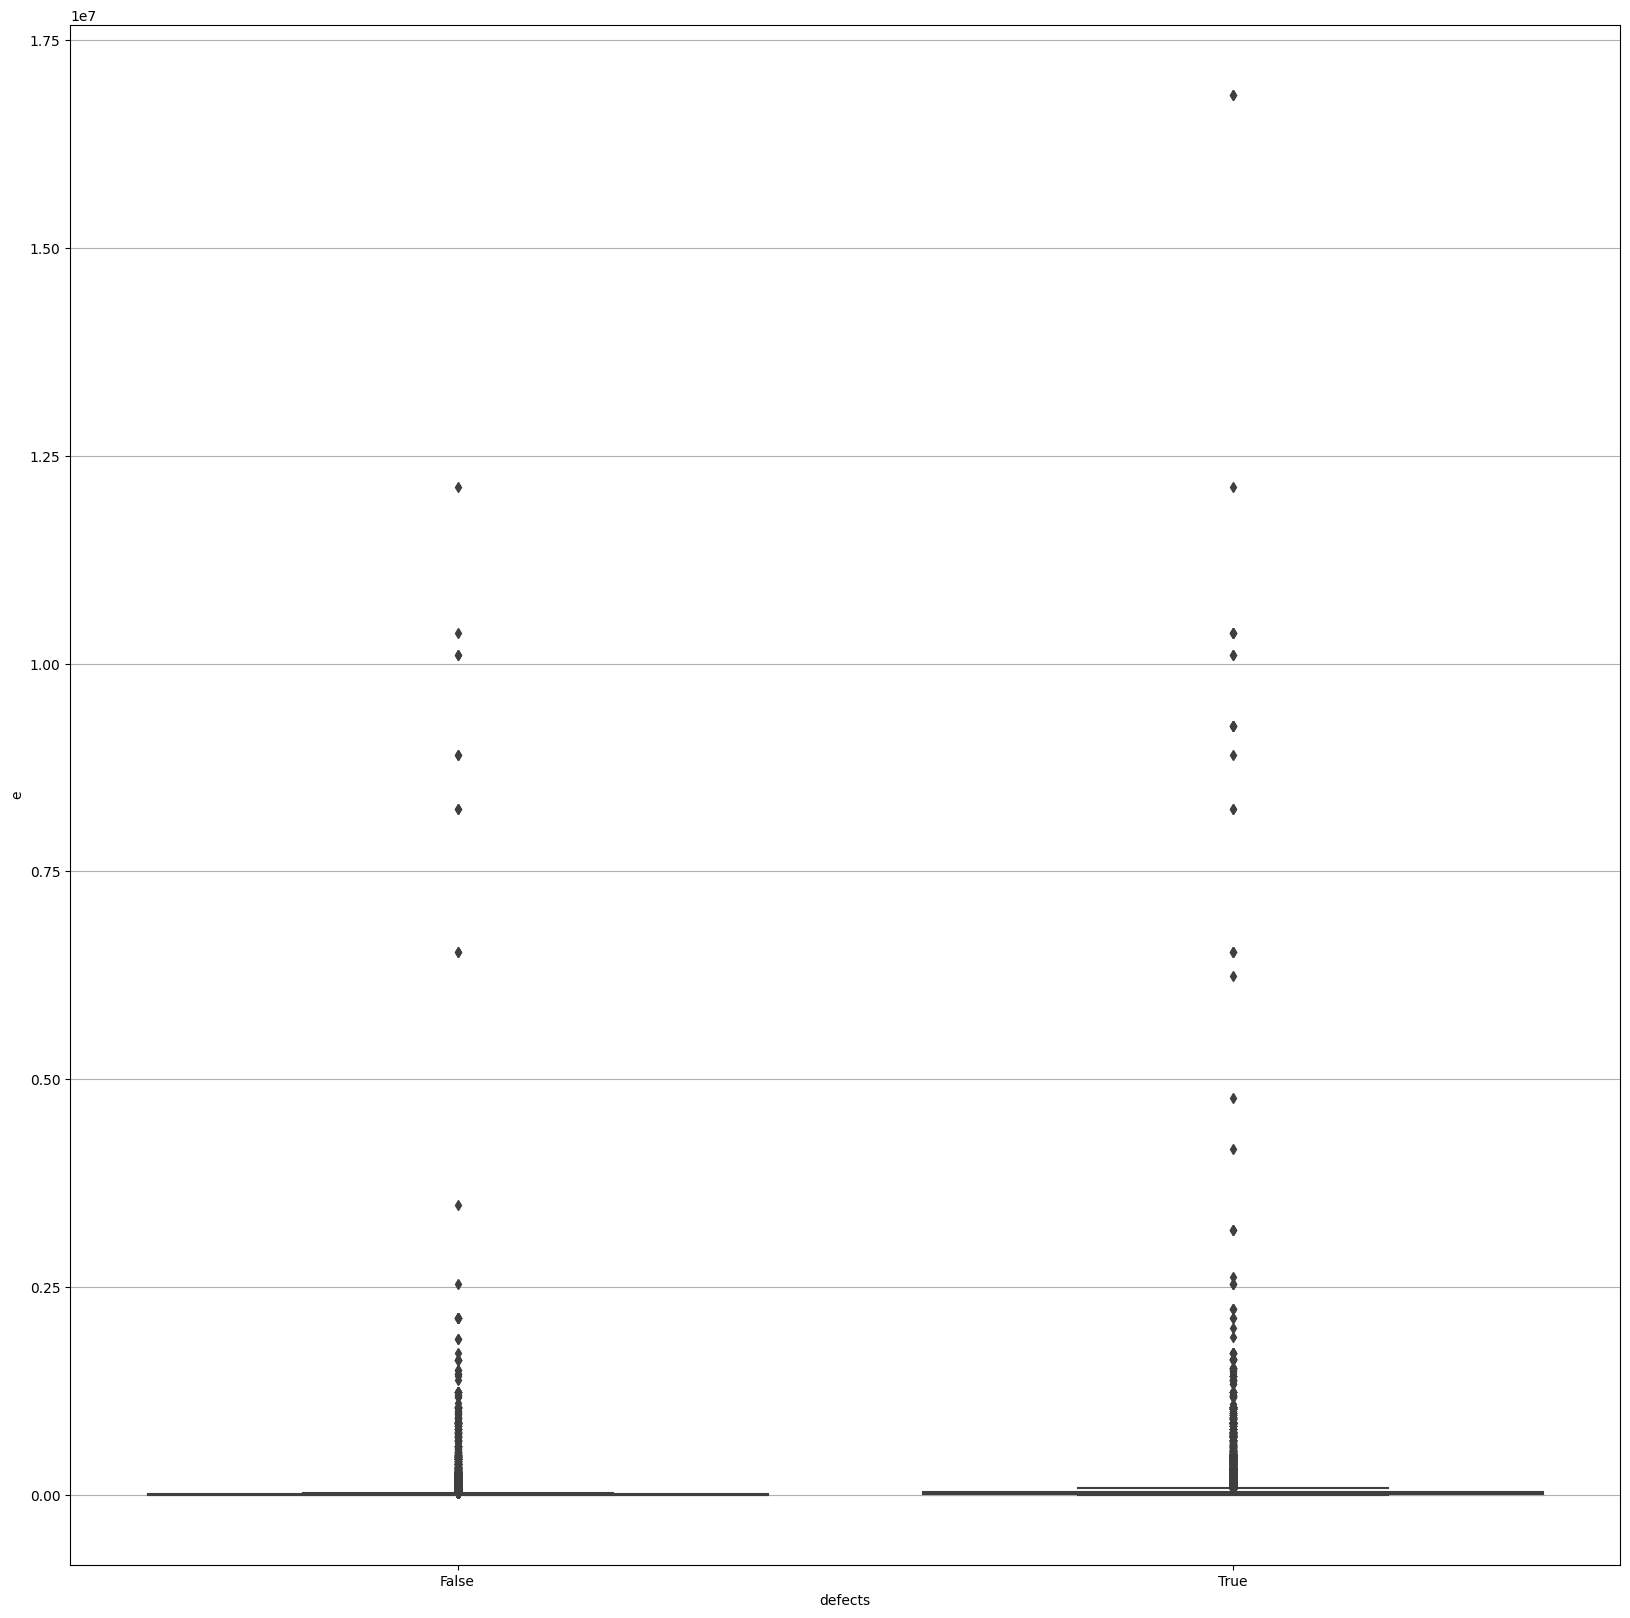

In [26]:
plt.figure(figsize=(20,20))
plt.grid()
sns.boxplot(data=df,x="defects",y="e")

<Axes: xlabel='defects', ylabel='b'>

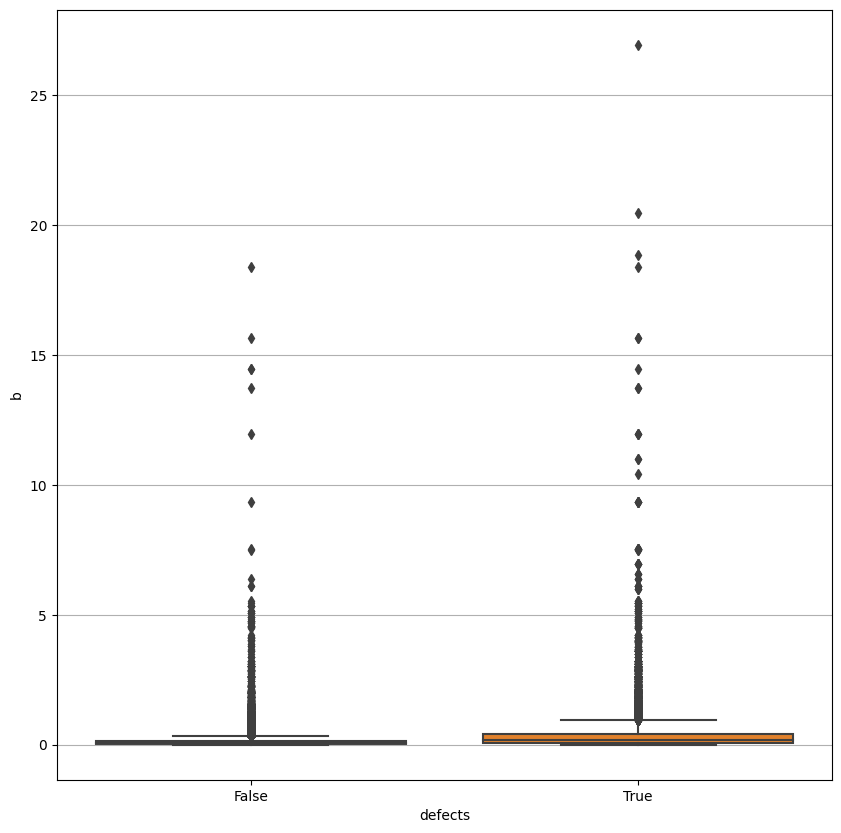

In [27]:
plt.figure(figsize=(10,10))
plt.grid()
sns.boxplot(data=df,x="defects",y="b")

<Axes: xlabel='defects', ylabel='t'>

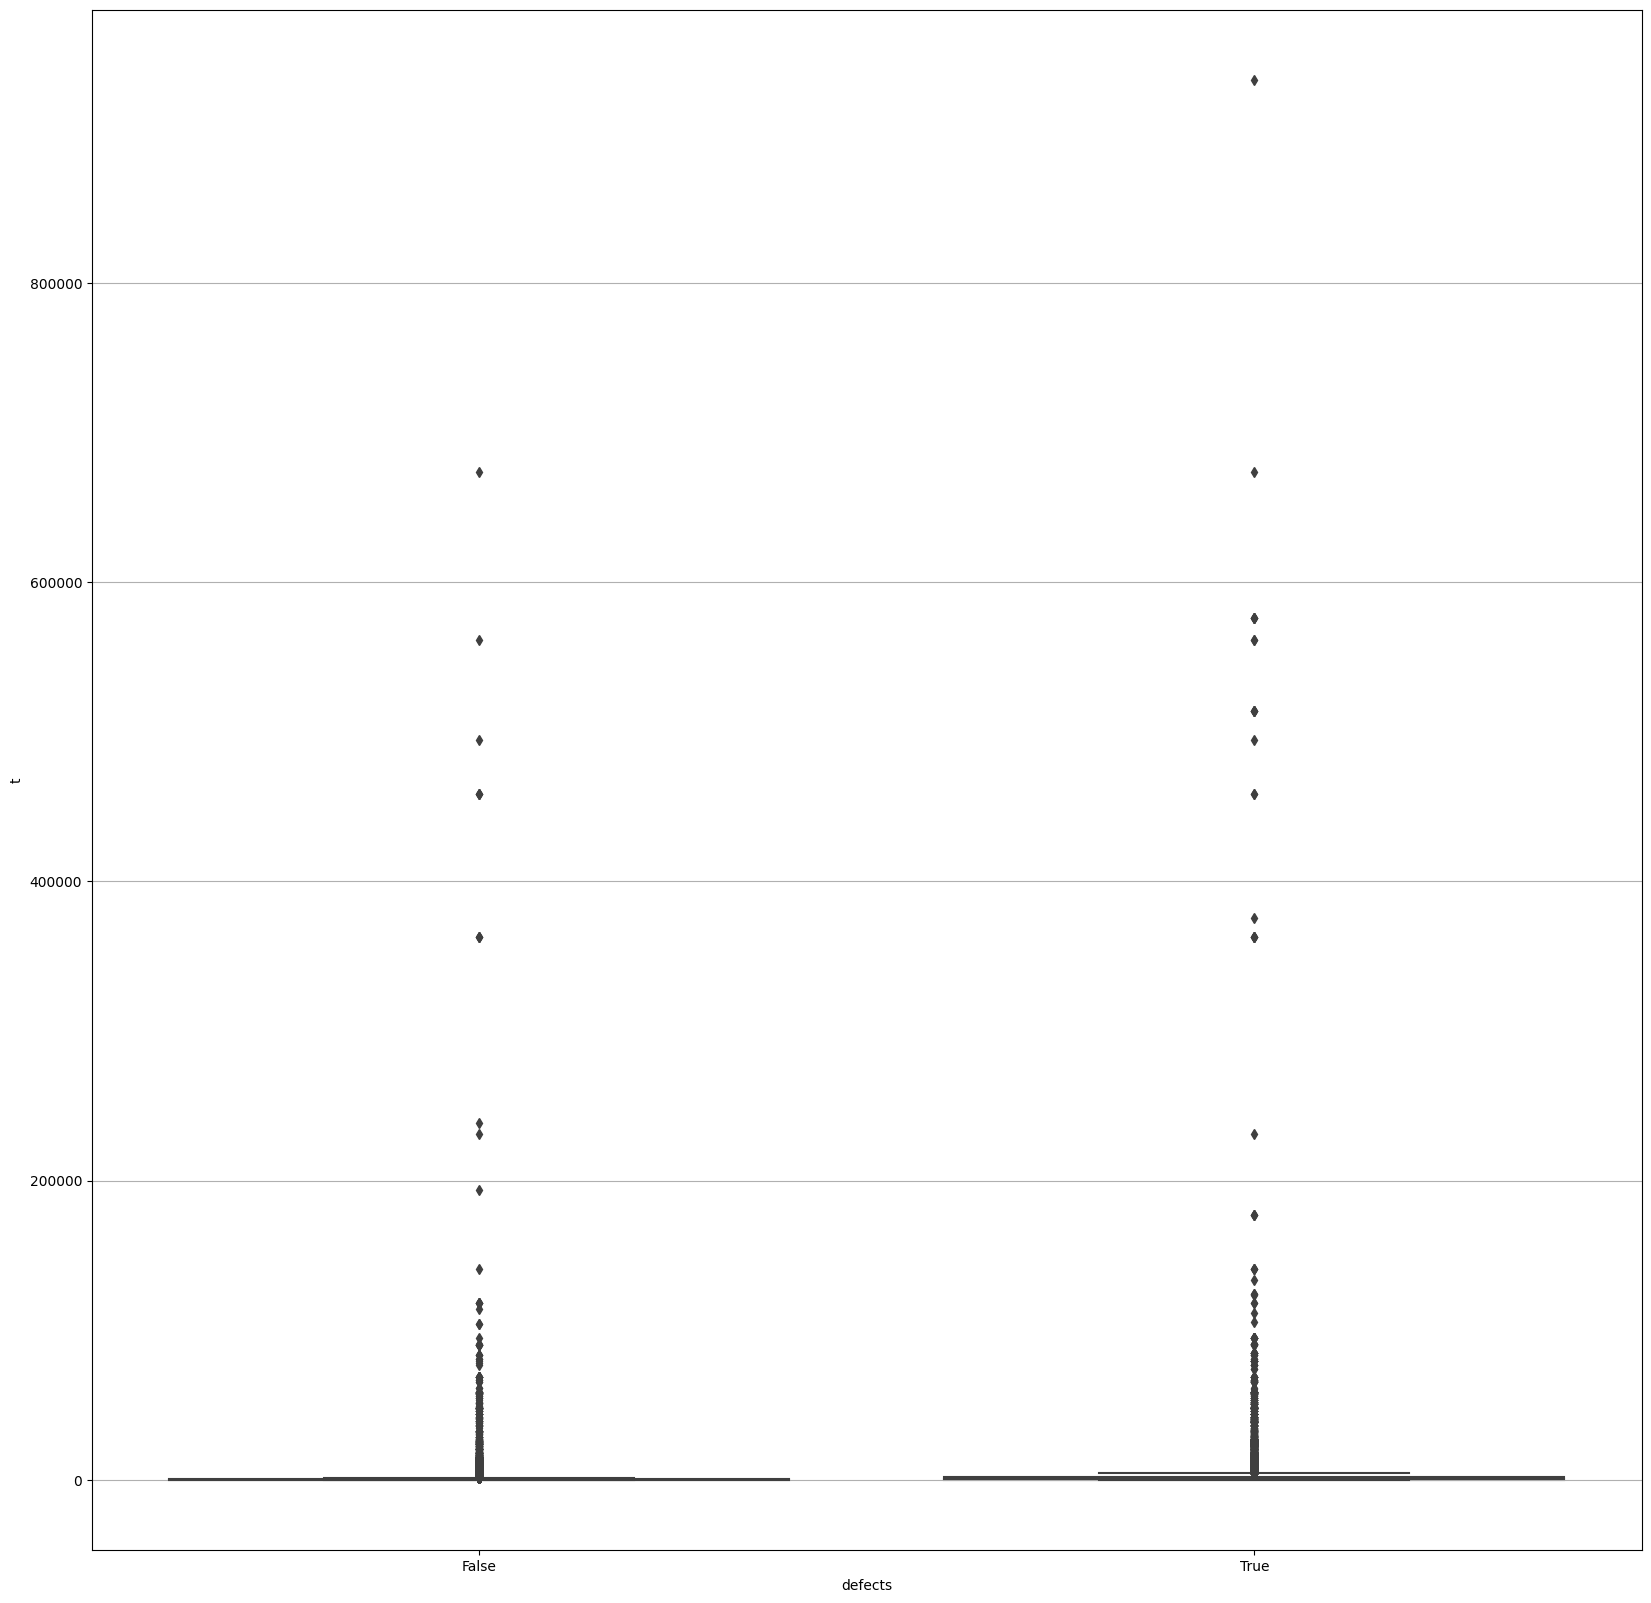

In [28]:
plt.figure(figsize=(20,20))
plt.grid()
sns.boxplot(data=df,x="defects",y="t")

In [29]:
df.drop(["id","lOCode","lOComment","lOBlank","locCodeAndComment","uniq_Op","total_Op","total_Opnd"],axis=1,inplace=True )

In [30]:
df3=pd.DataFrame()
df3["id"]=df1["id"]

In [31]:
df1.drop(["id","lOCode","lOComment","lOBlank","locCodeAndComment","uniq_Op","total_Op","total_Opnd"],axis=1,inplace=True )

In [32]:
df.head()

,loc,v(g),ev(g),iv(g),n,v,l,d,i,e,b,t,uniq_Opnd,branchCount,defects
0,22.0,3.0,1.0,2.0,60.0,278.63,0.06,19.56,14.25,5448.79,0.09,302.71,9.0,5.0,False
1,14.0,2.0,1.0,2.0,32.0,151.27,0.14,7.00,21.11,936.71,0.05,52.04,11.0,3.0,False
2,11.0,2.0,1.0,2.0,45.0,197.65,0.11,8.05,22.76,1754.01,0.07,97.45,11.0,3.0,False
3,8.0,1.0,1.0,1.0,23.0,94.01,0.19,5.25,17.86,473.66,0.03,26.31,6.0,1.0,True
4,11.0,2.0,1.0,2.0,17.0,60.94,0.18,5.63,12.44,365.67,0.02,20.31,6.0,3.0,False


In [33]:
df1.head()

,loc,v(g),ev(g),iv(g),n,v,l,d,i,e,b,t,uniq_Opnd,branchCount
0,33.0,5.0,1.0,4.0,144.0,824.82,0.04,26.96,30.05,22636.74,0.27,1257.60,23.0,9.0
1,27.0,8.0,8.0,2.0,125.0,646.24,0.04,22.82,27.22,14482.46,0.22,804.58,19.0,15.0
2,130.0,11.0,7.0,10.0,545.0,3831.40,0.02,48.15,66.17,116160.08,1.28,6453.34,53.0,21.0
3,65.0,7.0,1.0,7.0,156.0,855.71,0.06,17.23,49.89,16135.47,0.29,896.42,26.0,13.0
4,22.0,3.0,1.0,3.0,52.0,238.42,0.10,9.60,26.70,2624.49,0.08,145.80,15.0,5.0


In [34]:
x=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [35]:
x1=df1.iloc[:,:]

In [36]:
sc=StandardScaler()
x=sc.fit_transform(x)

In [37]:
x1=sc.fit_transform(x1)

In [38]:
LE=LabelEncoder()
y=LE.fit_transform(y)

In [39]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.25,random_state=0,stratify=y)

In [40]:
LR=LogisticRegression()
LR.fit(xtrain,ytrain)
ypred=LR.predict(xtest)

In [41]:
ypred1=LR.predict(x1)

In [42]:
ypred1

array([0, 0, 1, ..., 0, 0, 1])

In [43]:
trainscore=LR.score(xtrain,ytrain)
testscore=LR.score(xtest,ytest)
classreport=classification_report(ytest,ypred)

In [44]:
print(f"Training Score: {trainscore}\n Test Score:{testscore}\n classreport: {classreport}")

Training Score: 0.8080632058908309
 Test Score:0.8081836405801659
 classreport:               precision    recall  f1-score   support

           0       0.82      0.97      0.89     19675
           1       0.70      0.27      0.39      5766

    accuracy                           0.81     25441
   macro avg       0.76      0.62      0.64     25441
weighted avg       0.79      0.81      0.77     25441



In [45]:
LR.predict_proba(x1)

array([[0.77165293, 0.22834707],
       [0.78826621, 0.21173379],
       [0.46528082, 0.53471918],
       ...,
       [0.83494625, 0.16505375],
       [0.8593177 , 0.1406823 ],
       [0.43393081, 0.56606919]])

In [46]:
ypredprob=LR.predict_proba(x1)

In [47]:
ypredprob.shape

(67842, 2)

In [48]:
df3["defects"]=ypredprob[:,1]

In [49]:
df3.head()

,id,defects
0,101763,0.228347
1,101764,0.211734
2,101765,0.534719
3,101766,0.383475
4,101767,0.166143


In [50]:
df3.to_csv("submission.csv",index=False)